                   Agri  Construction  ElecAndAllied      Manu    Mining  \
Agri           1.000000      0.630739       0.096080  0.615985  0.317793   
Construction   0.630739      1.000000       0.691752  0.891226  0.824132   
ElecAndAllied  0.096080      0.691752       1.000000  0.716541  0.866835   
Manu           0.615985      0.891226       0.716541  1.000000  0.832527   
Mining         0.317793      0.824132       0.866835  0.832527  1.000000   
Services       0.062729      0.416909       0.196215  0.363288  0.259942   
Transport      0.237261     -0.188948      -0.561953 -0.256541 -0.441162   
GDP            0.219836      0.369499       0.251237  0.463266  0.271405   

               Services  Transport       GDP  
Agri           0.062729   0.237261  0.219836  
Construction   0.416909  -0.188948  0.369499  
ElecAndAllied  0.196215  -0.561953  0.251237  
Manu           0.363288  -0.256541  0.463266  
Mining         0.259942  -0.441162  0.271405  
Services       1.000000   0.02165

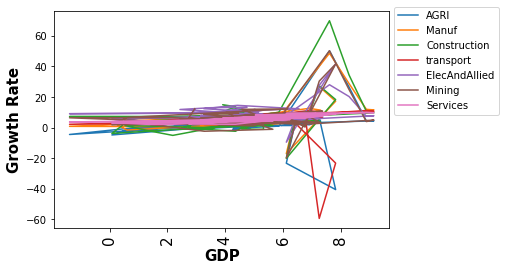

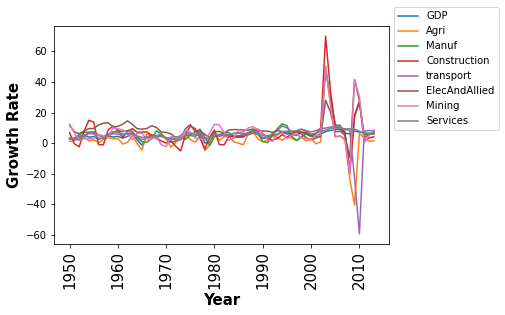

summary of train data                              OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     20.81
Date:                Tue, 22 Nov 2022   Prob (F-statistic):           6.86e-11
Time:                        18:29:09   Log-Likelihood:                -58.455
No. Observations:                  44   AIC:                             132.9
Df Residuals:                      36   BIC:                             147.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9510      0.

D:\juypter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\juypter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


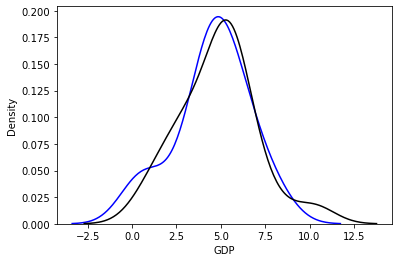

In [2]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#Reading file
df1=pd.read_csv('Mac.csv')
#Renaming columns
df1=df1.rename(columns={'Electricity, gas and water supply':'ElecAndAllied','Agriculture, forestry and fishing ':'Agri','Gross domestic product ( gdp ) at market prices':'GDP','Manufacturing':'Manu','Mining and quarrying':'Mining','Trade, hotel, transport and communications':'Transport'})
df1[['year','2']]=df1['Year'].str.split('-',expand=True)

#Choosing columns
df1=df1.loc[0:63,['year','Agri','Construction', 'ElecAndAllied' ,'Manu','Mining' ,'Services' ,'Transport','GDP']]
df1['year']=df1['year'].astype(str).astype(int)
#replacing null values
from scipy import interpolate
#Relacing null in Agri
y=df1.loc[0:62,['year']]
xy=y.squeeze()
x=df1.loc[0:62,['Agri']]
xx=x.squeeze()
f = interpolate.interp1d(xy,xx, fill_value='extrapolate')
df1.loc[63,['Agri']]=f(2013).astype(int)
df1['Agri']=df1['Agri'].astype(int)
#Replacing null in GDP
y=df1.loc[0:59,['year']]
xy=y.squeeze()
x=df1.loc[0:59,['GDP']]
xx=x.squeeze()
f = interpolate.interp1d(xy,xx, fill_value='extrapolate')
df1.loc[60,['GDP']]=f(2010)
df1.loc[61,['GDP']]=f(2011)
df1.loc[62,['GDP']]=f(2012)
df1.loc[63,['GDP']]=f(2013)

#Convertin to growth rate using gradient
Data=pd.DataFrame()
for k in range(1,9):
    dff=df1.iloc[:,k]
    y=np.gradient(dff)
    ygrowth=[]
    for i in range(len(y)):
        a=100*(y[i]/dff[i])
        ygrowth.append(a)
    Data.insert(loc=k-1,column=dff.to_frame().columns[0],value=ygrowth)
Data.insert(0,'year',df1['year'])

#Correlation
df2=Data.drop('year',axis=1)
print(df2.corr())

#Plotting Growth Rate vs GDP
plt.plot(Data['GDP'],Data['Agri'], label='AGRI')
plt.plot(Data['GDP'],Data['Manu'], label='Manuf')
plt.plot(Data['GDP'],Data['Construction'], label='Construction')
plt.plot(Data['GDP'],Data['Transport'], label='transport')
plt.plot(Data['GDP'],Data['ElecAndAllied'], label='ElecAndAllied')
plt.plot(Data['GDP'],Data['Mining'], label='Mining')
plt.plot(Data['GDP'],Data['Services'], label='Services')
plt.xlabel('GDP',fontsize=15,weight='bold')
plt.xticks(fontsize=15,rotation=90)
plt.ylabel('Growth Rate',fontsize=15,weight='bold')
plt.legend(loc='lower left',bbox_to_anchor=(1, 0.5))
plt.show()
#Plotting Growth Rate vs Year
plt.plot(Data['year'],Data['GDP'], label='GDP')
plt.plot(Data['year'],Data['Agri'], label='Agri')
plt.plot(Data['year'],Data['Manu'], label='Manuf')
plt.plot(Data['year'],Data['Construction'], label='Construction')
plt.plot(Data['year'],Data['Transport'], label='transport')
plt.plot(Data['year'],Data['ElecAndAllied'], label='ElecAndAllied')
plt.plot(Data['year'],Data['Mining'], label='Mining')
plt.plot(Data['year'],Data['Services'], label='Services')
plt.xlabel('Year',fontsize=15,weight='bold')
plt.xticks(fontsize=15,rotation=90)
plt.ylabel('Growth Rate',fontsize=15,weight='bold')
plt.legend(loc='lower left',bbox_to_anchor=(1, 0.5))
plt.show()

#LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
lr=LinearRegression()
y=Data['GDP']
x=Data[['Agri','Construction', 'ElecAndAllied' ,'Manu','Mining' ,'Services' ,'Transport']]
Scale=StandardScaler()
Scale.fit(x)
Data_scale=Scale.transform(x)
x_traina,x_testa,y_traina,y_testa=train_test_split(Data_scale,y,test_size=0.3,random_state=0)
lr.fit(x_traina,y_traina)
yhata=lr.predict(x_testa)
x_traina = sm.add_constant(x_traina)
model = sm.OLS(y_traina,x_traina).fit()
print('summary of train data ',model.summary())
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print('summary of total value ',model.summary())
#print('R2 value is :- ',lr.score(x_testa,y_testa))
ax1=sns.distplot(y_testa,hist=False, label='Actual',color='b')
sns.distplot(yhata,hist=False, label='predict',color='black',ax=ax1)
    
#calculating error value
nn=len(y_testa)
sum1=0
a=y_testa.tolist()
b=yhata.tolist()
for i in range(nn):
    diff=a[i]-b[i]
    dsqr=diff*diff
    sum1=sum1+dsqr
print('sum of error square is :-',sum1)


In [9]:
yhata[1]

0.8447238749309607

In [2]:
Data.corr()

,year,Agri,Construction,ElecAndAllied,Manu,Mining,Services,Transport,GDP
year,1.000000,0.001474,0.202677,0.002235,0.250423,0.207903,0.713423,-0.090715,0.581253
Agri,0.001474,1.000000,0.630739,0.096080,0.615985,0.317793,0.062729,0.237261,0.219836
Construction,0.202677,0.630739,1.000000,0.691752,0.891226,0.824132,0.416909,-0.188948,0.369499
ElecAndAllied,0.002235,0.096080,0.691752,1.000000,0.716541,0.866835,0.196215,-0.561953,0.251237
Manu,0.250423,0.615985,0.891226,0.716541,1.000000,0.832527,0.363288,-0.256541,0.463266
Mining,0.207903,0.317793,0.824132,0.866835,0.832527,1.000000,0.259942,-0.441162,0.271405
Services,0.713423,0.062729,0.416909,0.196215,0.363288,0.259942,1.000000,0.021655,0.796539
Transport,-0.090715,0.237261,-0.188948,-0.561953,-0.256541,-0.441162,0.021655,1.000000,-0.006673
GDP,0.581253,0.219836,0.369499,0.251237,0.463266,0.271405,0.796539,-0.006673,1.000000
